In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer

In [4]:
data = pd.read_csv("calhouse.csv")

data

,Unnamed: 0,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...,...
20635,20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [8]:
y = data["MedHouseVal"]
X = data.drop(columns = ["Unnamed: 0", "Latitude", 
              "Longitude", "MedHouseVal"])

In [10]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


In [16]:
equal_width_discretizer = KBinsDiscretizer(n_bins = 50, 
                                           encode = "ordinal",
                                          strategy = "uniform", 
                                          subsample = None)

In [18]:
equal_width_discretizer.fit(X[["MedInc"]])

KBinsDiscretizer(encode='ordinal', n_bins=50, strategy='uniform',
                 subsample=None)

In [20]:
X["equal_width_MedInc"] = equal_width_discretizer.transform(X[["MedInc"]])

In [22]:
import seaborn as sns

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

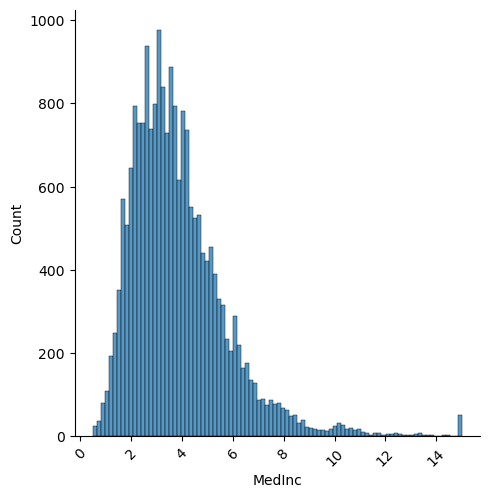

In [24]:
sns.displot(x = X["MedInc"])
plt.xticks(rotation = 45)
plt.tight_layout

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

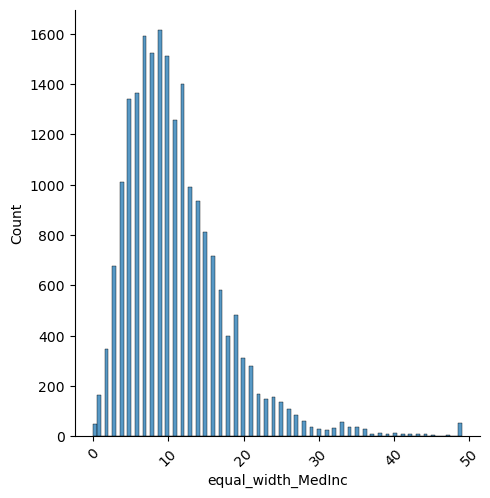

In [26]:
sns.displot(x = X["equal_width_MedInc"])
plt.xticks(rotation = 45)
plt.tight_layout

In [40]:
equal_freq_discretizer = KBinsDiscretizer(n_bins = 25, 
                                           encode = "ordinal",
                                          strategy = "quantile")

X["equal_freq_MedInc"] = equal_freq_discretizer.fit_transform(X[["MedInc"]])

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

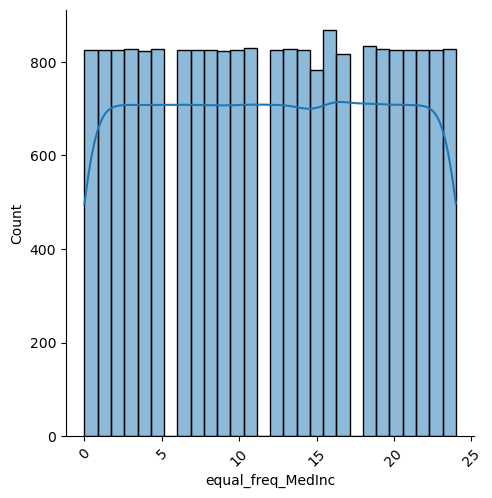

In [48]:
sns.displot(x = X["equal_freq_MedInc"], kde = True)
plt.xticks(rotation = 45)
plt.tight_layout

In [52]:
k_means_discretizer = KBinsDiscretizer(n_bins = 25,
                                      encode = "ordinal",
                                      strategy = "kmeans")

X["k_means_MedInc"] = k_means_discretizer.fit_transform(X[["MedInc"]])

(array([-5.,  0.,  5., 10., 15., 20., 25., 30.]),
 [Text(-5.0, 0, '−5'),
  Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25'),
  Text(30.0, 0, '30')])

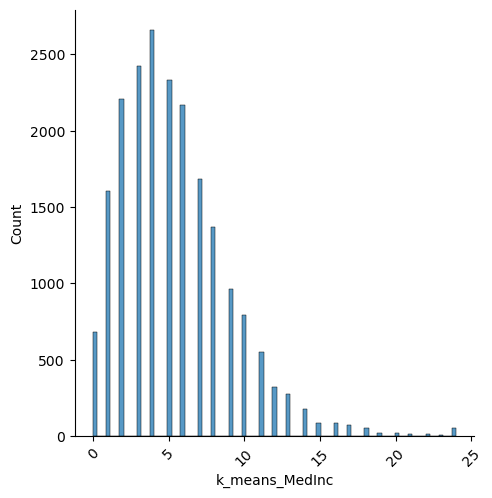

In [54]:
sns.displot(x = X["k_means_MedInc"])
plt.xticks(rotation = 45)

In [64]:
def custom_discretization(value):
    if value < 3:
        return "Low"
    elif value >= 3 and value < 10:
        return "Average"
    else:
        return "High"

X["custom_bins"] = X["MedInc"].apply(custom_discretization)

In [66]:
X.shape

(20640, 10)

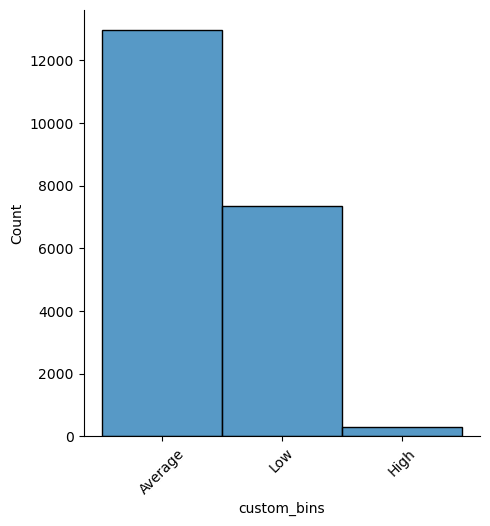

In [68]:
sns.displot(x = X["custom_bins"])
plt.xticks(rotation = 45);

In [72]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,equal_width_MedInc,equal_freq_MedInc,k_means_MedInc,custom_bins
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,26.0,24.0,14.0,Average
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,26.0,24.0,14.0,Average
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,23.0,23.0,12.0,Average
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,17.0,21.0,9.0,Average
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,11.0,14.0,5.0,Average
